In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [95]:
df_data=pd.read_csv('multiTimeline.csv')
def less_fun(value):
  if value=='<1':
    return 0
  return int(value)
df_data['Amber Heard: (Worldwide)']=df_data['Amber Heard: (Worldwide)'].apply(less_fun)
df_data['Average']=(df_data['Amber Heard: (Worldwide)']+df_data['Johnny Depp: (Worldwide)'])/2
df_data['difference']=df_data['Johnny Depp: (Worldwide)']-df_data['Amber Heard: (Worldwide)']

In [97]:
def plot_interest(column, ax, color, lim=True):
  ax.plot(df_data['Day'],df_data[column], color=color, marker='o', linestyle='-', label=column.split(':')[0])
  ax.set_xticks(np.arange(0, 90, 10))
  ax.set_xticklabels(df_data['Day'][:89:5])
  ax.set_xlabel('$Date$', fontsize=13)
  ax.set_ylabel('$Interest$', fontsize=13)
  if lim:
    ax.set_ylim(0, 100)

In [107]:
def plot_phase(ax, start, end,color, labels=True):
  ax.axvline(df_data['Day'][start],color='k' , linestyle='--', lw=1)
  ax.axvline(df_data['Day'][end],color='k' , linestyle='--', lw=1)
  ax.axvspan(df_data['Day'][start], df_data['Day'][end], alpha=0.1, color=color)
  if labels:
    ax.text(df_data['Day'][start-2], 50, df_data['Day'][start], rotation=90, va='center')
    ax.text(df_data['Day'][end+1], 50, df_data['Day'][end], rotation=90, va='center')

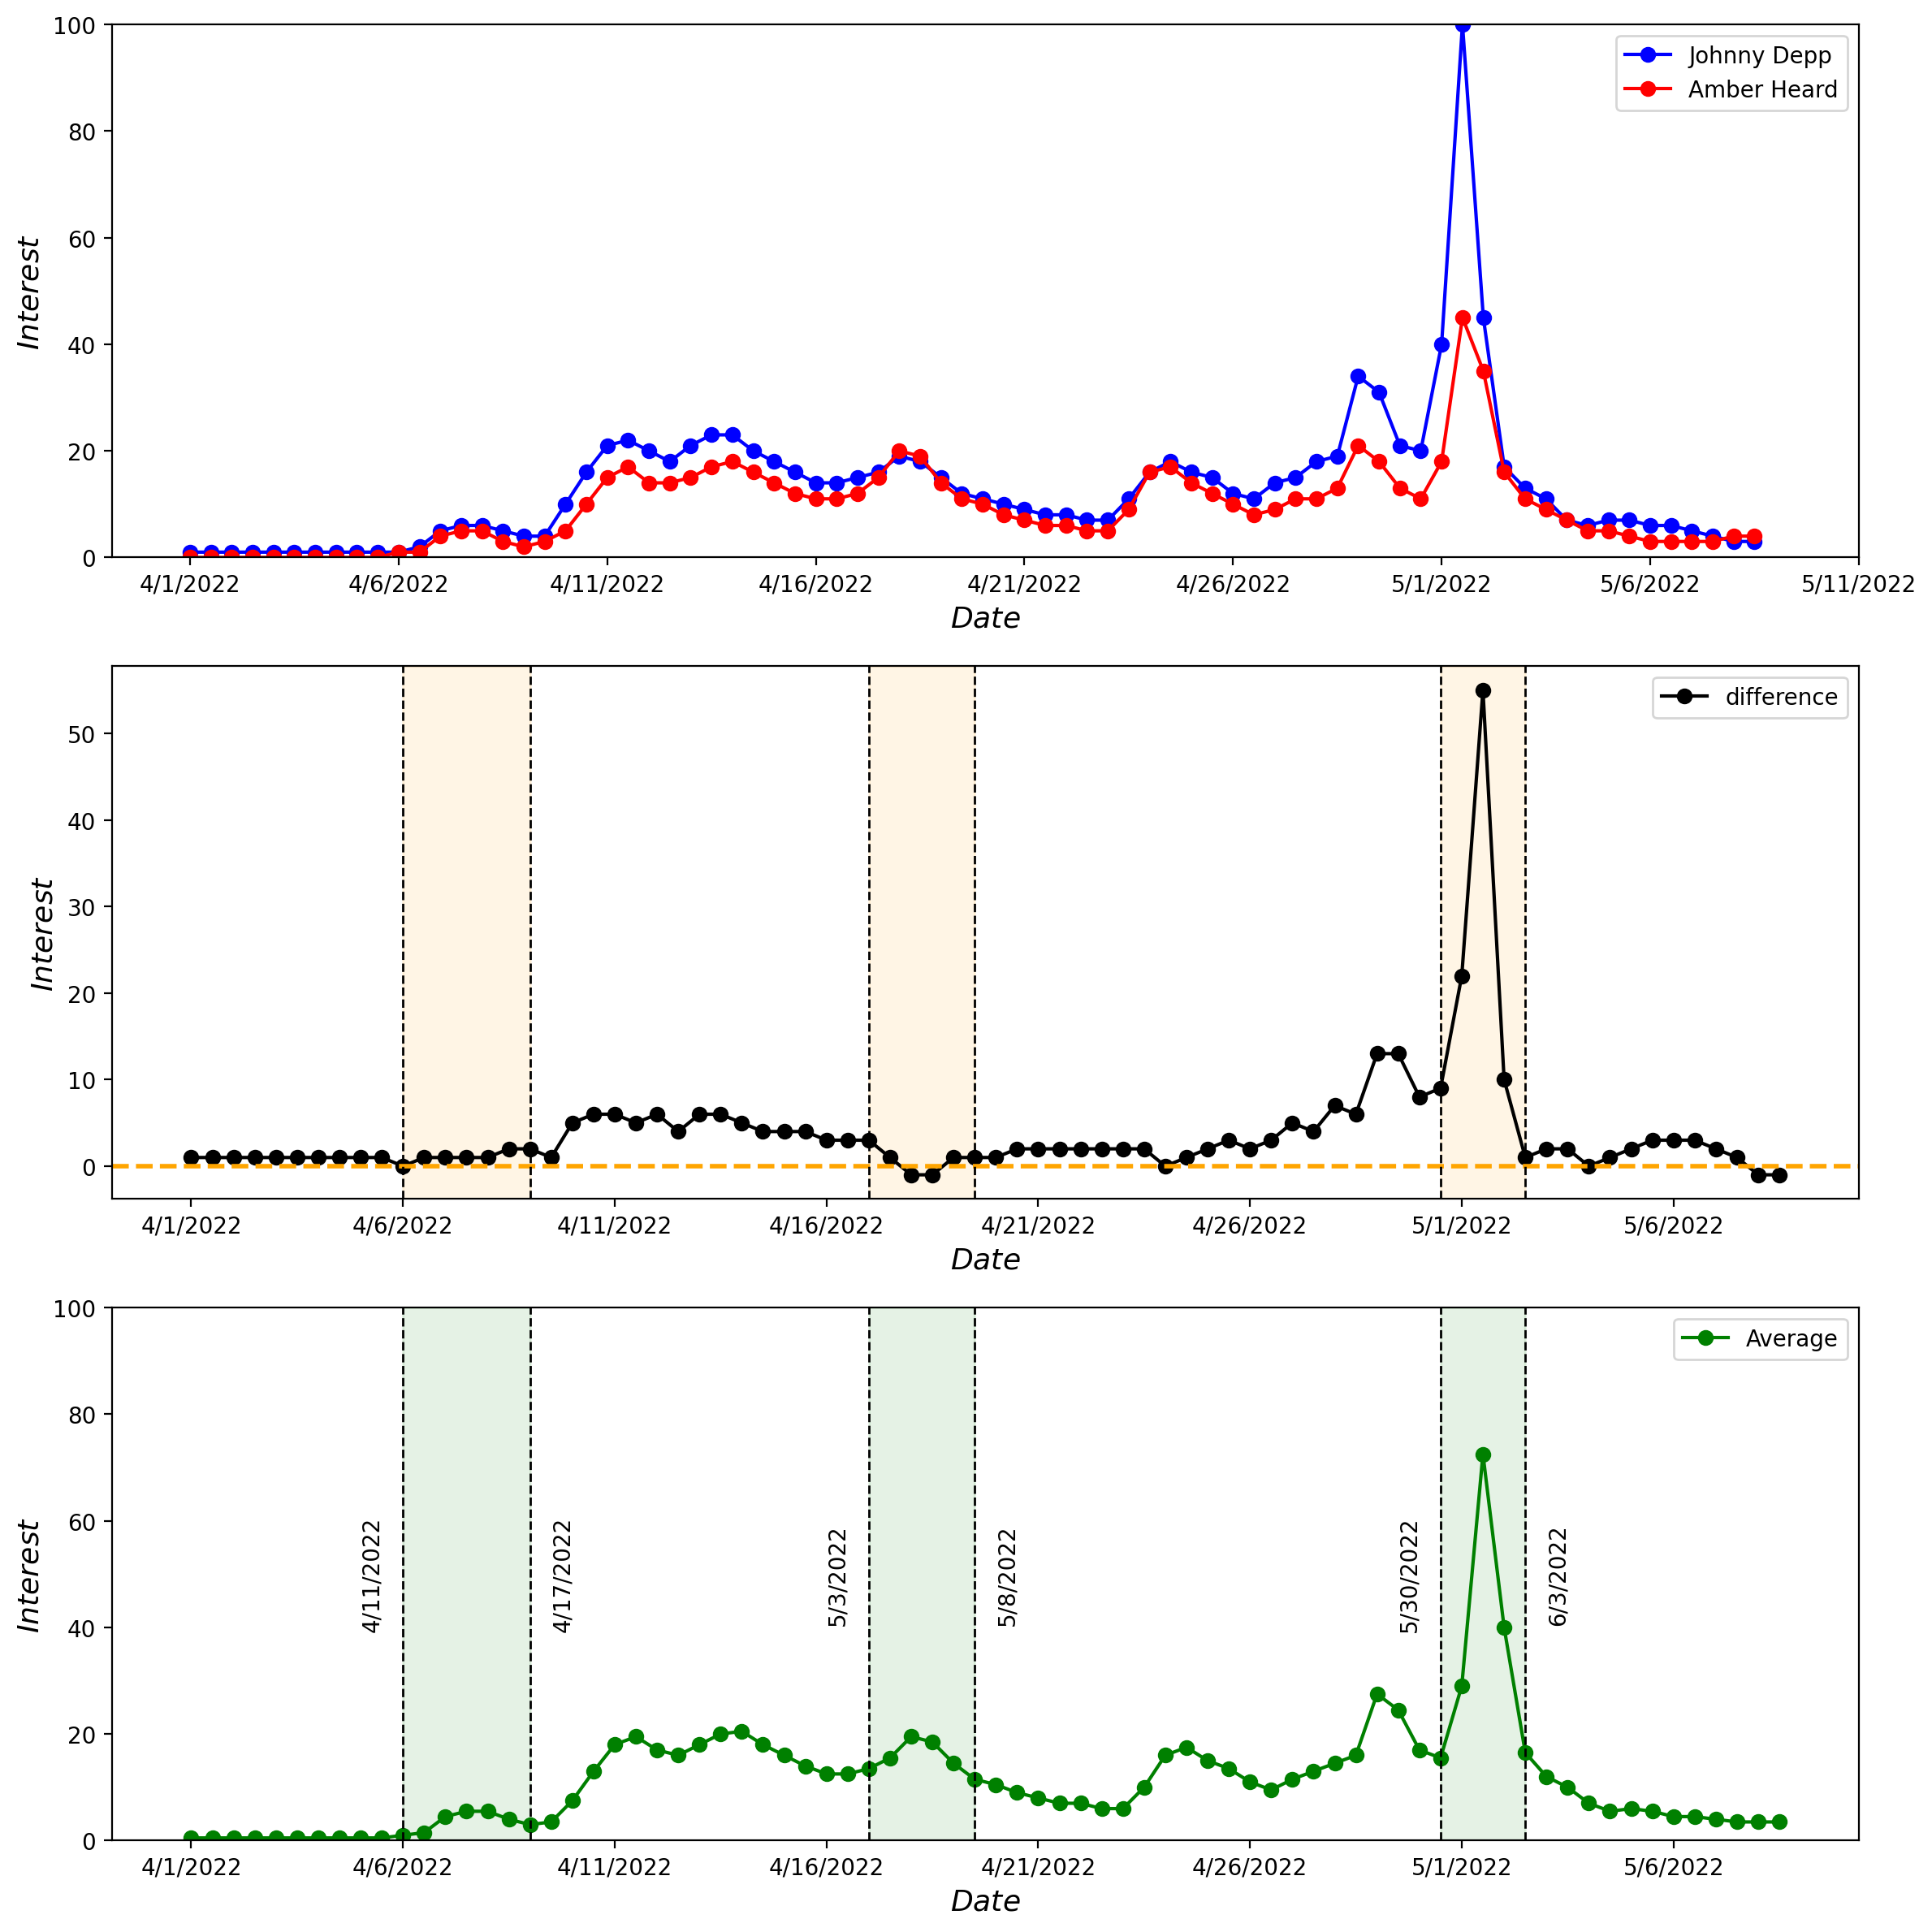

In [113]:
fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(12, 12) , dpi=200)
plot_interest('Johnny Depp: (Worldwide)',ax[0],'b')
plot_interest('Amber Heard: (Worldwide)',ax[0],'r')

plot_interest('difference',ax[1],'k', False)
ax[1].axhline(0,color='orange' , linestyle='--', lw=2)
plot_phase(ax[1] , 10, 16,'orange', False)
plot_phase(ax[1] , 32, 37,'orange', False)
plot_phase(ax[1] , 59, 63,'orange', False)

plot_interest('Average',ax[2],'g')
plot_phase(ax[2] , 10, 16,'g')
plot_phase(ax[2] , 32, 37,'g')
plot_phase(ax[2] , 59, 63,'g')
for i in range(len(ax)):
  ax[i].legend(loc='upper right')
fig.tight_layout()
fig.savefig('google_search_interset.jpeg')